In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("../data/cities.csv")


In [20]:
df["names"] = df["names"].apply(lambda x: x.strip())

In [21]:
df

,names,cords
0,"Youngstown, OH",-5572.57 2839.81
1,"Yankton, SD",-6729.21 2962.82
2,"Yakima, WA",-8326.72 3219.84
3,"Worcester, MA",-4961.07 2920.67
4,"Wisconsin Dells, WI",-6202.70 3014.64
...,...,...
123,"Reno, NV",-8278.33 2730.66
124,"Regina, SA",-7230.86 3483.78
125,"Red Bluff, CA",-8446.23 2776.26
126,"Reading, PA",-5246.43 2786.63


In [22]:
df["cords"] = df["cords"].apply(lambda x: x.strip())

In [23]:
df

,names,cords
0,"Youngstown, OH",-5572.57 2839.81
1,"Yankton, SD",-6729.21 2962.82
2,"Yakima, WA",-8326.72 3219.84
3,"Worcester, MA",-4961.07 2920.67
4,"Wisconsin Dells, WI",-6202.70 3014.64
...,...,...
123,"Reno, NV",-8278.33 2730.66
124,"Regina, SA",-7230.86 3483.78
125,"Red Bluff, CA",-8446.23 2776.26
126,"Reading, PA",-5246.43 2786.63


In [24]:
df2 = pd.DataFrame([[float(cord) for cord in xy_cord.split()] for xy_cord in df["cords"].values], columns=["x", "y"])
df2

,x,y
0,-5572.57,2839.81
1,-6729.21,2962.82
2,-8326.72,3219.84
3,-4961.07,2920.67
4,-6202.70,3014.64
...,...,...
123,-8278.33,2730.66
124,-7230.86,3483.78
125,-8446.23,2776.26
126,-5246.43,2786.63


In [25]:
df2["name"] = df["names"]

In [26]:
df2

,x,y,name
0,-5572.57,2839.81,"Youngstown, OH"
1,-6729.21,2962.82,"Yankton, SD"
2,-8326.72,3219.84,"Yakima, WA"
3,-4961.07,2920.67,"Worcester, MA"
4,-6202.70,3014.64,"Wisconsin Dells, WI"
...,...,...,...
123,-8278.33,2730.66,"Reno, NV"
124,-7230.86,3483.78,"Regina, SA"
125,-8446.23,2776.26,"Red Bluff, CA"
126,-5246.43,2786.63,"Reading, PA"


In [37]:
df3 = pd.concat([df2.sample(500, replace=True).reset_index(drop=True), df2.sample(500, replace=True).reset_index(drop=True)], axis=1, ignore_index=True)

In [39]:
df3.columns = ["cord_1_x", "cord_1_y", "city_1", "cord_2_x", "cord_2_y", "city_2"]

In [41]:
df3 = df3[df3["city_1"] != df3["city_2"]]

In [43]:
df3["dist"] = np.sqrt(np.square(df3["cord_1_x"] - df3["cord_2_x"]) + np.square(df3["cord_1_y"] - df3["cord_2_y"]))

/tmp/ipykernel_176614/1598034247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["dist"] = np.sqrt(np.square(df3["cord_1_x"] - df3["cord_2_x"]) + np.square(df3["cord_1_y"] - df3["cord_2_y"]))


In [49]:
df3.to_csv("cities_processed.csv")

In [47]:
df3[df3["dist"] == 0]

,cord_1_x,cord_1_y,city_1,cord_2_x,cord_2_y,city_2,dist


<AxesSubplot: >

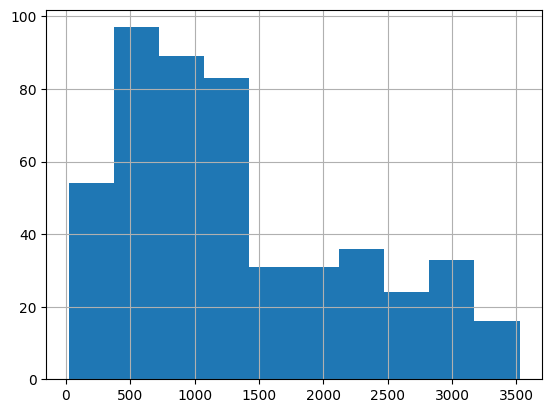

In [46]:
df3["dist"].hist()

In [27]:
for city_name, city_cords in df2.groupby("name"):
    df2.sample(10)

Ravenna, OH
Reading, PA
Red Bluff, CA
Regina, SA
Reno, NV
Rhinelander, WI
Richfield, UT
Richmond, IN
Richmond, VA
Roanoke, VA
Rochester, MN
Rochester, NY
Rock Springs, WY
Rockford, IL
Rocky Mount, NC
Roswell, NM
Rutland, VT
Sacramento, CA
Saginaw, MI
Saint Augustine, FL
Saint Cloud, MN
Saint Johnsbury, VT
Saint Joseph, MI
Saint Joseph, MO
Saint Louis, MO
Saint Paul, MN
Salem, OR
Salida, CO
Salina, KS
Salinas, CA
Salisbury, MD
Salt Lake City, UT
San Angelo, TX
San Antonio, TX
San Bernardino, CA
San Diego, CA
San Francisco, CA
San Jose, CA
Sandusky, OH
Santa Ana, CA
Santa Barbara, CA
Santa Fe, NM
Santa Rosa, CA
Sarasota, FL
Sault Sainte Marie, MI
Savannah, GA
Schenectady, NY
Scottsbluff, NB
Scranton, PA
Seattle, WA
Sedalia, MO
Selma, AL
Seminole, OK
Sheridan, WY
Sherman, TX
Shreveport, LA
Sioux City, IA
Sioux Falls, SD
South Bend, IN
Spokane, WA
Springfield, IL
Springfield, MA
Springfield, MO
Springfield, OH
Staunton, VA
Sterling, CO
Steubenville, OH
Stevens Point, WI
Stockton, CA
Stroud

In [50]:
import inspect

In [55]:
import sys
sys.path.append("../src/problem/")

In [63]:
class A:
    def get(self, a, b):
        pass

ImportError: attempted relative import with no known parent package